# Input module examples

This is not yet perfect, but is getting there and will improve with further usage. 

The dataframes which are returned are designed to incorporate and easily make the most of the tools provided by the [OpenSCM](https://github.com/openclimatedata/openscm/) DataFrame. 

To do:

- switch to using openscm dataframe
- link to tutorial on using such a dataframe
- incorporate pint and show how to do units stuff

In [1]:
%matplotlib inline

from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError
import matplotlib.pyplot as plt
plt.style.use('bmh') 

import expectexception

In [2]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")
TEST_DATA_DIR = join("..", "tests", "test_data")

## Read files

In [3]:
mdata = MAGICCData()
mdata.read(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.head()

,variable,todo,unit,region,time,value
0,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5OECD,1765,0.003
1,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5OECD,1766,0.003
2,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5OECD,1767,0.003
3,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5OECD,1768,0.003
4,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5OECD,1769,0.003


In [4]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE \r\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37 \r\n'
           ' \r\n'
           ' \r\n'
           'DATA:  Historical fossil&industrial CO2 (CO2I) Emissions '
           '(HISTRCP_CO2I_EMIS) \r\n'
           'SOURCE:  RCP data as presented on '

## Accessors

When we're using openscm dataframes, redo this bit.

At the moment we can only use standard row filtering.

In [5]:
mdata.df[mdata.df.region.str.contains("ASIA")].head()

,variable,todo,unit,region,time,value
484,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,1765,0.0
485,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,1766,0.0
486,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,1767,0.0
487,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,1768,0.0
488,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|R5ASIA,1769,0.0


### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [6]:
mdata.read(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.df.head()

,variable,todo,unit,region,time,value
0,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2000,0.0
1,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2001,0.0
2,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2002,0.0
3,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2003,0.0
4,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|Bunkers,2004,0.0


In [7]:
mdata.df[
    mdata.df.variable.str.contains("BC")
    & mdata.df.region.str.contains("ASIA")
].head()

,variable,todo,unit,region,time,value
392,Emissions|BC,SET,Mt BC / yr,World|R5ASIA,2000,3.0468
393,Emissions|BC,SET,Mt BC / yr,World|R5ASIA,2001,3.1090
394,Emissions|BC,SET,Mt BC / yr,World|R5ASIA,2002,3.1818
395,Emissions|BC,SET,Mt BC / yr,World|R5ASIA,2003,3.2546
396,Emissions|BC,SET,Mt BC / yr,World|R5ASIA,2004,3.3274


### Reading RCP data files

We can also read the RCP data files provided at http://www.pik-potsdam.de/~mmalte/rcps/. These are also tricky as the underlying data format is unique.

In [8]:
mdata.read(join(TEST_DATA_DIR, "RCP3PD_EMISSIONS.DAT"))
mdata.df.head()

,variable,todo,unit,region,time,value
0,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1765,0.003
1,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1766,0.003
2,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1767,0.003
3,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1768,0.003
4,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World,1769,0.003


In [9]:
pprint(mdata.df["variable"].unique().tolist())

['Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CH4',
 'Emissions|N2O',
 'Emissions|SOx',
 'Emissions|CO',
 'Emissions|NMVOC',
 'Emissions|NOx',
 'Emissions|BC',
 'Emissions|OC',
 'Emissions|NH3',
 'Emissions|CF4',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|HFC23',
 'Emissions|HFC32',
 'Emissions|HFC4310',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC245fa',
 'Emissions|SF6',
 'Emissions|CFC11',
 'Emissions|CFC12',
 'Emissions|CFC113',
 'Emissions|CFC114',
 'Emissions|CFC115',
 'Emissions|CCl4',
 'Emissions|CH3CCl3',
 'Emissions|HCFC22',
 'Emissions|HCFC141b',
 'Emissions|HCFC142b',
 'Emissions|Halon1211',
 'Emissions|Halon1202',
 'Emissions|Halon1301',
 'Emissions|Halon2402',
 'Emissions|CH3Br',
 'Emissions|CH3Cl']


In [10]:
mdata.read(join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_CONCENTRATIONS.DAT"))
mdata.df.head()

,variable,todo,unit,region,time,value
0,Atmospheric Concentrations|CO2 Equivalent,SET,ppm,World,1765,277.01467
1,Atmospheric Concentrations|CO2 Equivalent,SET,ppm,World,1766,277.83880
2,Atmospheric Concentrations|CO2 Equivalent,SET,ppm,World,1767,278.69351
3,Atmospheric Concentrations|CO2 Equivalent,SET,ppm,World,1768,278.74752
4,Atmospheric Concentrations|CO2 Equivalent,SET,ppm,World,1769,278.79644


In [11]:
pprint(mdata.df["variable"].unique().tolist())

['Atmospheric Concentrations|CO2 Equivalent',
 'Atmospheric Concentrations|CO2 Equivalent|Kyoto Gases',
 'Atmospheric Concentrations|CO2',
 'Atmospheric Concentrations|CH4',
 'Atmospheric Concentrations|N2O',
 'Atmospheric Concentrations|HFC134a Equivalent|F Gases',
 'Atmospheric Concentrations|CFC12 Equivalent|Montreal Protocol Halogen Gases',
 'Atmospheric Concentrations|CF4',
 'Atmospheric Concentrations|C2F6',
 'Atmospheric Concentrations|C6F14',
 'Atmospheric Concentrations|HFC23',
 'Atmospheric Concentrations|HFC32',
 'Atmospheric Concentrations|HFC4310',
 'Atmospheric Concentrations|HFC125',
 'Atmospheric Concentrations|HFC134a',
 'Atmospheric Concentrations|HFC143a',
 'Atmospheric Concentrations|HFC227ea',
 'Atmospheric Concentrations|HFC245fa',
 'Atmospheric Concentrations|SF6',
 'Atmospheric Concentrations|CFC11',
 'Atmospheric Concentrations|CFC12',
 'Atmospheric Concentrations|CFC113',
 'Atmospheric Concentrations|CFC114',
 'Atmospheric Concentrations|CFC115',
 'Atmospheric

In [12]:
mdata.read(join(TEST_DATA_DIR, "RCP3PD_MIDYEAR_RADFORCING.DAT"))
mdata.df.head()

,variable,todo,unit,region,time,value
0,Radiative Forcing,SET,W / m^2,World,1765,0.000000
1,Radiative Forcing,SET,W / m^2,World,1766,0.126027
2,Radiative Forcing,SET,W / m^2,World,1767,0.273031
3,Radiative Forcing,SET,W / m^2,World,1768,0.278871
4,Radiative Forcing,SET,W / m^2,World,1769,0.242045


In [13]:
pprint(mdata.df["variable"].unique().tolist())

['Radiative Forcing',
 'Radiative Forcing|Volcanic',
 'Radiative Forcing|Solar',
 'Radiative Forcing|Anthropogenic',
 'Radiative Forcing|Greenhouse Gases',
 'Radiative Forcing|Greenhouse Gases|Kyoto Gases',
 'Radiative Forcing|CO2, CH4 and N2O',
 'Radiative Forcing|CO2',
 'Radiative Forcing|CH4',
 'Radiative Forcing|N2O',
 'Radiative Forcing|F Gases',
 'Radiative Forcing|Montreal Protocol Halogen Gases',
 'Radiative Forcing|CF4',
 'Radiative Forcing|C2F6',
 'Radiative Forcing|C6F14',
 'Radiative Forcing|HFC23',
 'Radiative Forcing|HFC32',
 'Radiative Forcing|HFC4310',
 'Radiative Forcing|HFC125',
 'Radiative Forcing|HFC134a',
 'Radiative Forcing|HFC143a',
 'Radiative Forcing|HFC227ea',
 'Radiative Forcing|HFC245fa',
 'Radiative Forcing|SF6',
 'Radiative Forcing|CFC11',
 'Radiative Forcing|CFC12',
 'Radiative Forcing|CFC113',
 'Radiative Forcing|CFC114',
 'Radiative Forcing|CFC115',
 'Radiative Forcing|CCl4',
 'Radiative Forcing|CH3CCl3',
 'Radiative Forcing|HCFC22',
 'Radiative Forcing

### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [14]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):
    if file.endswith((".exe")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(
            join(MAGICC6_DIR, file)
        )
    else:
        mdata = MAGICCData()
        mdata.read(join(MAGICC6_DIR, file))
        all_run_files[file] = mdata

In [15]:
sorted(all_run_files.keys())

['EDGAR_NOXB_EMIS.IN',
 'EDGAR_NOXI_EMIS.IN',
 'GISS_BCB_OT.IN',
 'GISS_BCB_RF.IN',
 'GISS_BCI_OT.IN',
 'GISS_BCI_RF.IN',
 'GISS_BCSNOW_RF.IN',
 'GISS_LANDUSE_RF.IN',
 'GISS_NOX_RF.IN',
 'GISS_OCB_OT.IN',
 'GISS_OCB_RF.IN',
 'GISS_OCI_OT.IN',
 'GISS_OCI_RF.IN',
 'GISS_OCN_OT.IN',
 'GISS_SOXI_OT.IN',
 'GISS_SOXNB_OT.IN',
 'GISS_SOX_RF.IN',
 'GISS_SS_OT.IN',
 'HISTRCP2009_SOLAR_RF.IN',
 'HISTRCP45SCP45to3PD_SOLAR_RF.IN',
 'HISTRCP45_SOLAR_RF.IN',
 'HISTRCP60_2300_SOLAR_RF.IN',
 'HISTRCP6SCP6to45_SOLAR_RF.IN',
 'HISTRCP6_SOLAR_RF.IN',
 'HISTRCP85_SOLAR_RF.IN',
 'HISTRCP_BCB_EMIS.IN',
 'HISTRCP_BCI_EMIS.IN',
 'HISTRCP_C2F6_CONC.IN',
 'HISTRCP_C2F6_EMIS.IN',
 'HISTRCP_C6F14I_EMIS.IN',
 'HISTRCP_C6F14_CONC.IN',
 'HISTRCP_C6F14_EMIS.IN',
 'HISTRCP_CF4_CONC.IN',
 'HISTRCP_CF4_EMIS.IN',
 'HISTRCP_CH4B_EMIS.IN',
 'HISTRCP_CH4I_EMIS.IN',
 'HISTRCP_CH4_CONC.IN',
 'HISTRCP_CO2B_EMIS.IN',
 'HISTRCP_CO2I_EMIS.IN',
 'HISTRCP_CO2_CONC.IN',
 'HISTRCP_COB_EMIS.IN',
 'HISTRCP_COI_EMIS.IN',
 'HISTRCP_HFC12

In [16]:
all_run_files["SRESB2.SCEN"].head(4)

,variable,todo,unit,region,time,value
0,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|ALM,1990,0.7152
1,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|ALM,2000,1.0116
2,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|ALM,2010,1.2639
3,Emissions|CO2|MAGICC Fossil and Industrial,SET,Gt C / yr,World|ALM,2020,1.4831


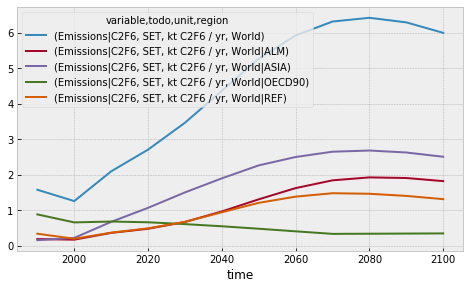

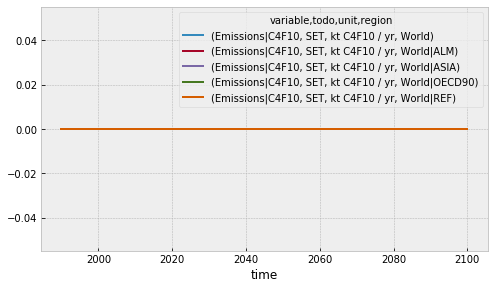

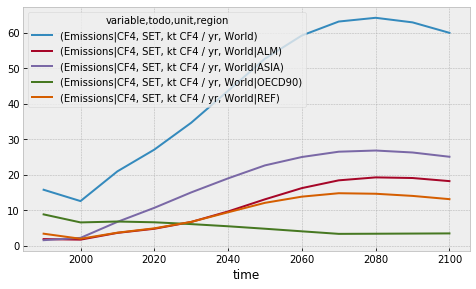

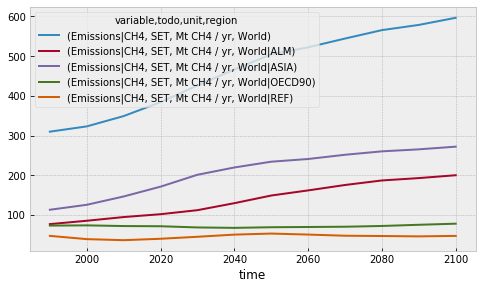

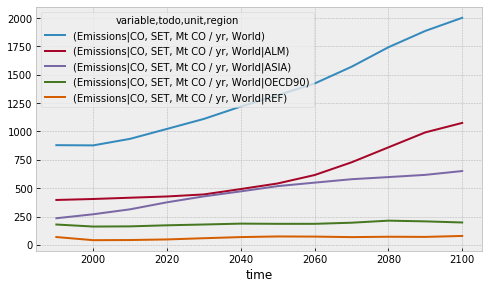

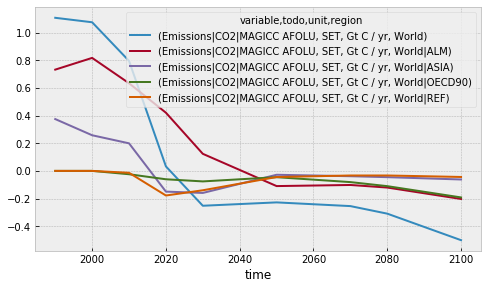

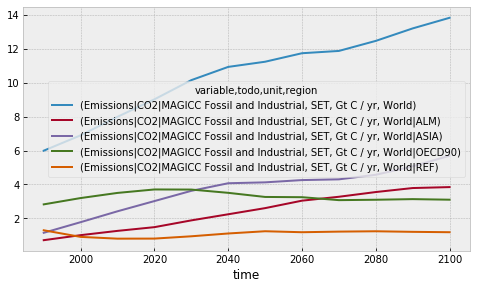

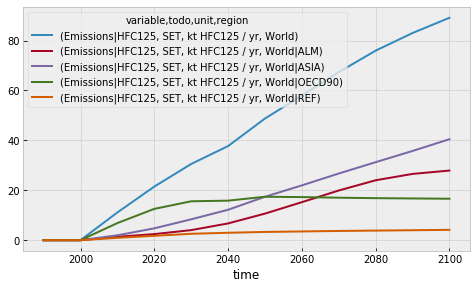

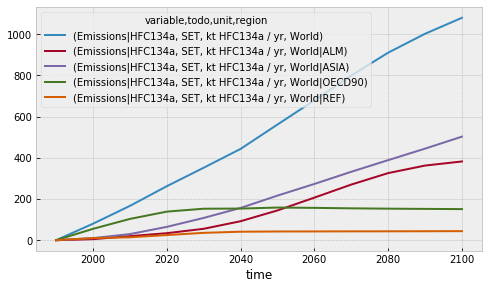

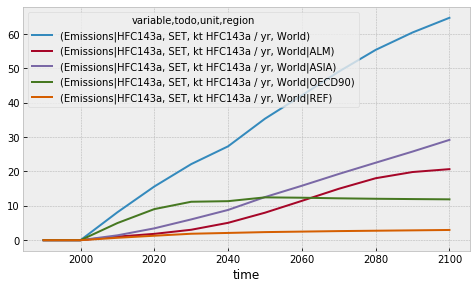

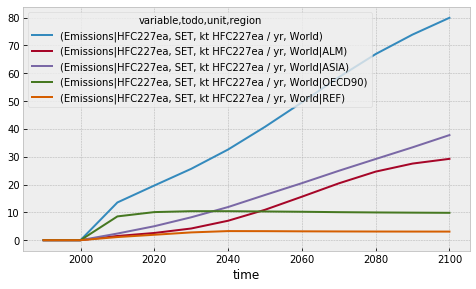

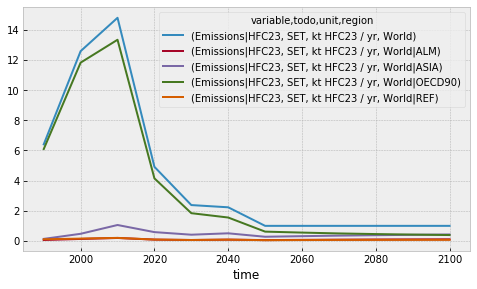

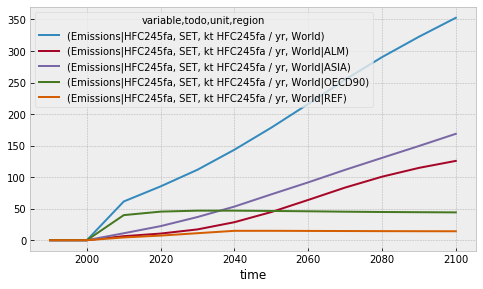

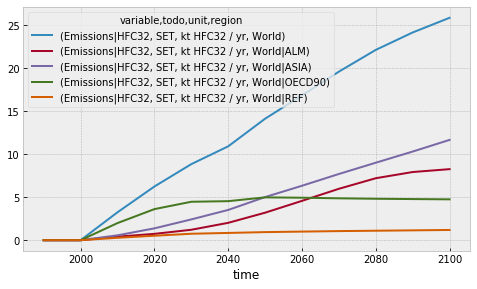

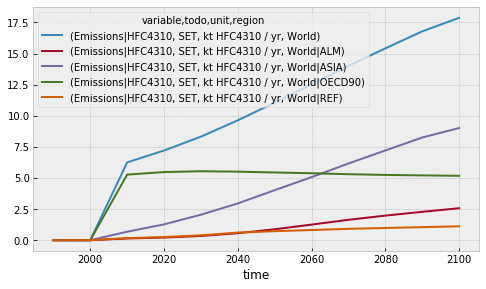

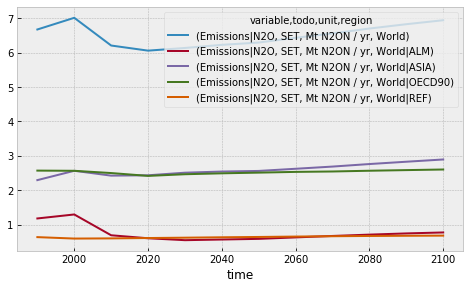

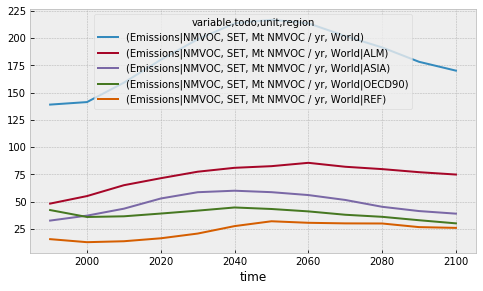

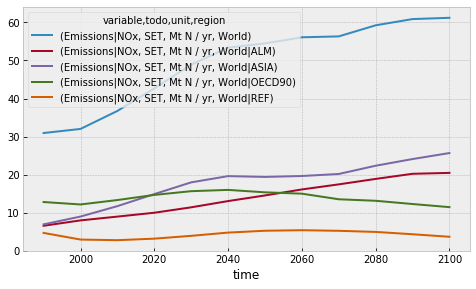

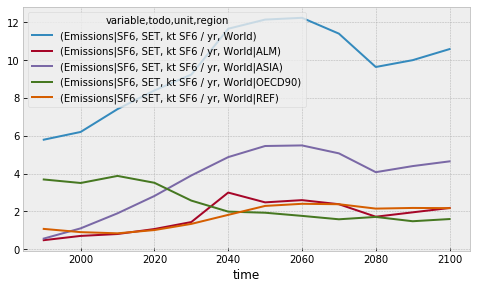

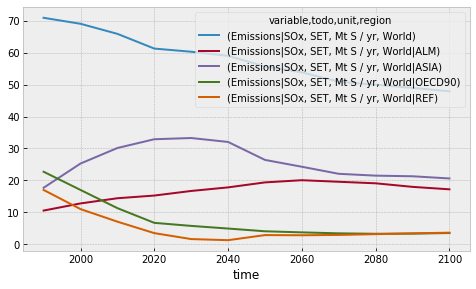

In [17]:
all_run_files["SRESB2.SCEN"].pivot_table(
    values="value", index="time", columns=["variable", "todo", "unit", "region"]
).groupby(level="variable", axis=1).plot(figsize=(8, 4.5));

## Writing files

Once you have your data in the format as above, writing files is trivial. 

In [18]:
mdata.read(join(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN"))
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN", magicc_version=7)

mdata.read(join(MAGICC6_DIR, "RCP45.SCEN"))
mdata.write("SCENEXAMPLE.SCEN", magicc_version=7)

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions. Our error messaging will hopefully make this slightly clearer.

In [19]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt", magicc_version=7)

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-19-20ac4c194f29> in <module>
----> 1 mdata.write("histexample.txt", magicc_version=7)

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in write(self, filepath, magicc_version)
   1846             for.
   1847         """
-> 1848         writer = self.determine_tool(filepath, "writer")(magicc_version=magicc_version)
   1849         writer.write(self, filepath)
   1850 

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in determine_tool(self, filepath, tool_to_get)
   1974             )
   1975 
-> 1976         raise NoReaderWriterError(error_msg)
   1977 
   1978 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filepath must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
EmisIn: ^.*\_EMIS.*\.IN